In [247]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [248]:
# Paths
pjoin = lambda p1, p2 : os.path.join(p1, p2)
OUT_PATH = 'output'

In [249]:
# Data sample
df = pd.read_csv('data/mytest.csv', skipinitialspace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                5478 non-null   object 
 1   rating                       5478 non-null   object 
 2   startYear                    5478 non-null   int64  
 3   endYear                      5478 non-null   object 
 4   runtimeMinutes               5478 non-null   object 
 5   awardWins                    4591 non-null   float64
 6   numVotes                     5478 non-null   int64  
 7   worstRating                  5478 non-null   int64  
 8   bestRating                   5478 non-null   int64  
 9   totalImages                  5478 non-null   int64  
 10  totalVideos                  5478 non-null   int64  
 11  totalCredits                 5478 non-null   int64  
 12  criticReviewsTotal           5478 non-null   int64  
 13  titleType         

In [250]:
# Find Duplicates (on title)
duplicated_titles = df[df['originalTitle'].duplicated(keep=False)]
duplicated_titles.to_excel(pjoin(OUT_PATH, 'duplicated_titles.xlsx'))
del duplicated_titles

In [251]:
# (0) Find Duplicates (rows in general)
duplicated_rows = df[df.duplicated(keep=False)].reset_index(drop=True)
duplicated_rows.to_excel(pjoin(OUT_PATH, 'duplicated_rows.xlsx'))
del duplicated_rows

In [252]:
# (1) Drop Duplicates (rows in general)
df = df.drop_duplicates()

In [253]:
### Todo: Check if other kind of data duplication (example on the title) represents an issue.

In [254]:
# (2) Clean ratings (from "(x, y]" to y : int)
df['rating'] = df['rating'].apply( lambda rt : int(rt.split(',')[1].replace(']', '')) )
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Geologist of Animal Collective Performs Live a...,10,2015,\N,21,0.0,15,1,10,7,...,video,0,False,True,0,1,0,15,['US'],"Music,Short"
1,Shan gou 1999,5,1999,\N,\N,0.0,304,1,10,10,...,movie,0,False,True,0,4,8,304,['HK'],Horror
2,The Craftsman: Preserving the Last Higgins Boat,9,2023,\N,\N,0.0,10,1,10,2,...,tvSpecial,0,False,True,0,1,0,10,['US'],Reality-TV
3,Week 3: Tuesday,7,2020,\N,\N,0.0,11,1,10,0,...,tvEpisode,0,False,True,0,1,0,11,['GB'],Game-Show
4,Traumhaus,6,1999,\N,90,NaN,145,1,10,2,...,tvEpisode,0,False,True,0,1,0,145,['DE'],"Crime,Drama,Mystery"


In [255]:
# Clean runtimeMinutes.
df['runtimeMinutes'] = df['runtimeMinutes'].replace(r'\N', '0')
df['runtimeMinutes'] = df['runtimeMinutes'].astype(int)
#mv = df[df['runtimeMinutes'] != r'\N' & df['runtimeMinutes'].astype(int) > 120]
#mv
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Geologist of Animal Collective Performs Live a...,10,2015,\N,21,0.0,15,1,10,7,...,video,0,False,True,0,1,0,15,['US'],"Music,Short"
1,Shan gou 1999,5,1999,\N,0,0.0,304,1,10,10,...,movie,0,False,True,0,4,8,304,['HK'],Horror
2,The Craftsman: Preserving the Last Higgins Boat,9,2023,\N,0,0.0,10,1,10,2,...,tvSpecial,0,False,True,0,1,0,10,['US'],Reality-TV
3,Week 3: Tuesday,7,2020,\N,0,0.0,11,1,10,0,...,tvEpisode,0,False,True,0,1,0,11,['GB'],Game-Show
4,Traumhaus,6,1999,\N,90,NaN,145,1,10,2,...,tvEpisode,0,False,True,0,1,0,145,['DE'],"Crime,Drama,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,Parasiz yasamak pahali,8,1994,\N,141,NaN,45,1,10,1,...,video,0,False,True,0,1,0,45,['TR'],Comedy
5474,Wedding Bell Blues,7,1994,\N,22,0.0,19,1,10,17,...,tvEpisode,0,False,True,0,1,0,19,['US'],"Comedy,Family,Sport"
5475,O anthropos pou to 'paize poly!,4,1983,\N,85,NaN,14,1,10,1,...,movie,0,False,True,0,1,0,14,['GR'],Comedy
5476,Above Average Presents,7,2012,\N,0,0.0,111,1,10,56,...,tvSeries,0,True,True,0,2,3,111,['US'],Comedy


In [256]:
### Compute correlation.
corr = df.corr(method='pearson', min_periods=1, numeric_only=True)
# Show correlations higher than 0.7.
filt_corr = corr[(corr > 0.7) & (corr < 1)]
result = filt_corr.stack().reset_index()
result.columns = ['rowIndex', 'columnIndex', 'correlation']
result = result[result['rowIndex'] < result['columnIndex']]
result

,rowIndex,columnIndex,correlation
2,numVotes,userReviewsTotal,0.877057
3,numVotes,ratingCount,1.000000
4,criticReviewsTotal,numVotes,0.702509
5,criticReviewsTotal,userReviewsTotal,0.769506
6,criticReviewsTotal,ratingCount,0.702550
7,awardNominationsExcludeWins,awardWins,0.716455
13,ratingCount,userReviewsTotal,0.877077


In [257]:
### Remove correlated cells numVotes and ratingCount. New column totVotes as the mean.
df['totVotes'] = df[['numVotes', 'ratingCount']].mean(axis=1).astype(int)
df.drop('ratingCount', axis=1, inplace=True)
df.drop('numVotes', axis=1, inplace=True)
df['totVotes']


0        15
1       304
2        10
3        11
4       145
       ... 
5473     45
5474     19
5475     14
5476    111
5477     11
Name: totVotes, Length: 5478, dtype: int32

In [258]:
### Removes zero votes records.
df = df[df['totVotes'] != 0]

In [259]:
### Note that data on totVotes is sparse
df['totVotes'].describe()

count    5.478000e+03
mean     1.524597e+03
std      2.258215e+04
min      5.000000e+00
25%      1.400000e+01
50%      3.700000e+01
75%      1.450000e+02
max      1.071531e+06
Name: totVotes, dtype: float64

In [260]:
### Stabilizing variance.
df['totVotesLog'] = numpy.log(df['totVotes'])

In [261]:
### Normalize totVotes (new column 'totVotesNorm') using minmax norm.
df['totVotesNorm'] = (df['totVotes'] - df['totVotes'].min()) / (df['totVotes'].max() - df['totVotes'].min())
df['totVotesNorm'].describe()


count    5478.000000
mean        0.001418
std         0.021075
min         0.000000
25%         0.000008
50%         0.000030
75%         0.000131
max         1.000000
Name: totVotesNorm, dtype: float64

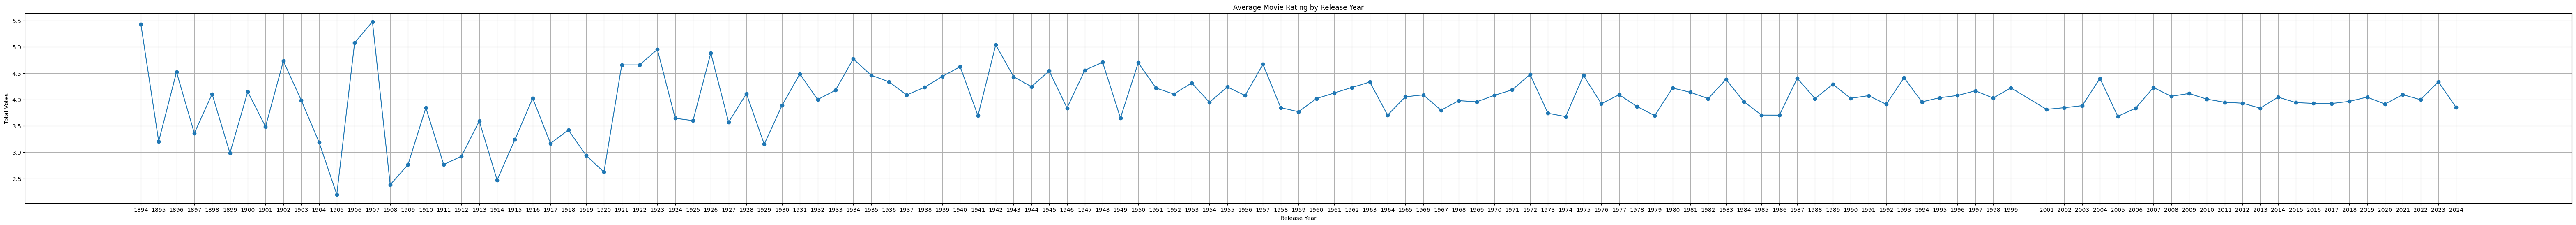

In [262]:
### Plot number of votes on year of release.
numvotesByYear = df.groupby('startYear')['totVotesLog'].mean().reset_index()
numvotesByYear.columns = ['releaseYear', 'totVotesLog']
plt.figure(figsize=(80, 6))
plt.plot(numvotesByYear['releaseYear'], numvotesByYear['totVotesLog'], marker='o')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Votes')
plt.xticks(numvotesByYear['releaseYear'])  # Show all years on x-axis
plt.grid()
plt.show()
del numvotesByYear

In [263]:
### Compute PCA
"""
num_df = df.drop(columns=['originalTitle', 'endYear', 'titleType', 'canHaveEpisodes', 'isRatable', 'countryOfOrigin', 'genres'])
num_df.replace(r'\N', 0, inplace=True)
num_df.fillna(0, inplace=True)
num_df = num_df.T
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 147-148: malformed \N character escape (3782561128.py, line 2)

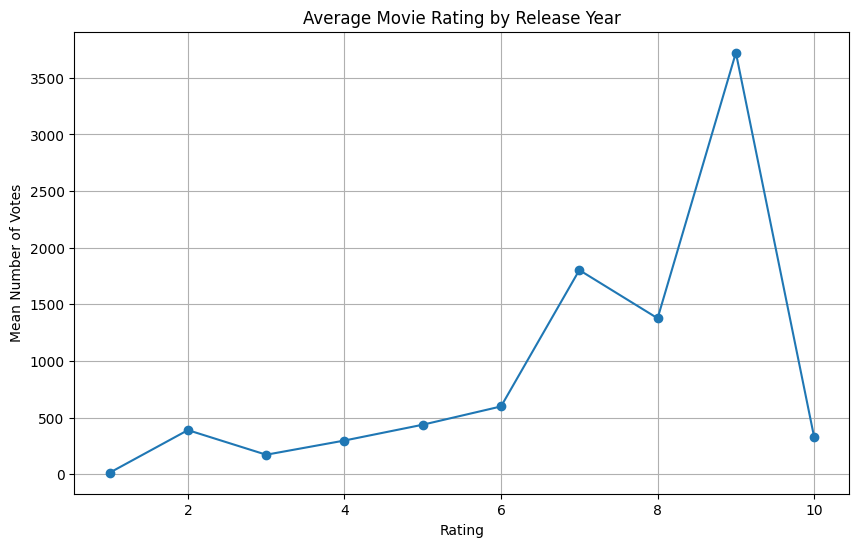

In [ ]:
### Plot vote on number of votes mean.
rankByNumVotes = df.groupby('rating')['totVotes'].mean().reset_index()
rankByNumVotes.columns = ['totVotes', 'rating']
plt.figure(figsize=(10, 6))
plt.plot(rankByNumVotes['totVotes'], rankByNumVotes['rating'], marker='o')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Votes')
plt.grid()
plt.show()
del rankByNumVotes

In [269]:
### Plot vote on number of votes mean.
dcopy = df.select_dtypes(include=['number'])
#dcopy = dcopy.groupby('rating').mean().reset_index()
#dcopy = dcopy[['totVotes', 'rating', 'startYear']]
dcopy
"""
rankByNumVotes['releaseWindow'] = pd.cut(rankByNumVotes['startYear'], bins=numpy.arrange(1900, 10, 2020), labels=[str(num) for num in numpy.arrange(1900, 10, 2020)], right=True)
plt.figure(figsize=(20, 20))
sns.scatterplot(data=rankByNumVotes, x='rating', y='totVotes', hue='releaseWindow', style='Category', palette='deep')
plt.plot(rankByNumVotes['totVotes'], rankByNumVotes['rating'], marker='o')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Votes')
plt.grid()
plt.show()
del rankByNumVotes
"""

"\nrankByNumVotes['releaseWindow'] = pd.cut(rankByNumVotes['startYear'], bins=numpy.arrange(1900, 10, 2020), labels=[str(num) for num in numpy.arrange(1900, 10, 2020)], right=True)\nplt.figure(figsize=(20, 20))\nsns.scatterplot(data=rankByNumVotes, x='rating', y='totVotes', hue='releaseWindow', style='Category', palette='deep')\nplt.plot(rankByNumVotes['totVotes'], rankByNumVotes['rating'], marker='o')\nplt.title('Average Movie Rating by Release Year')\nplt.xlabel('Rating')\nplt.ylabel('Mean Number of Votes')\nplt.grid()\nplt.show()\ndel rankByNumVotes\n"

"\nplt.plot(rankByNumVotes['totVotes'], rankByNumVotes['rating'], marker='o')\nplt.title('Average Movie Rating by Release Year')\nplt.xlabel('Rating')\nplt.ylabel('Mean Number of Votes')\nplt.grid()\nplt.show()\ndel rankByNumVotes\n"

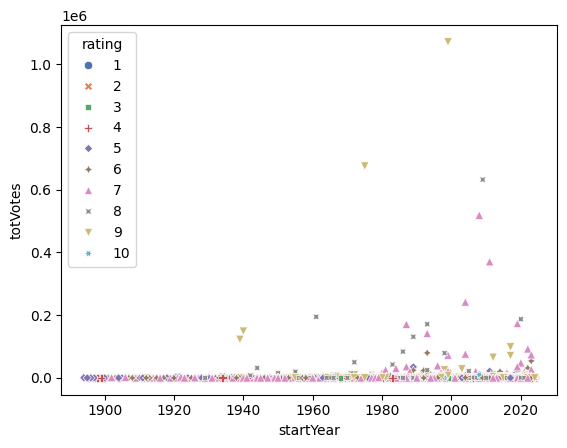

In [278]:
### Plot vote on number of votes mean.
dcopy = df.select_dtypes(include=['number'])
#dcopy = dcopy.groupby('rating').mean().reset_index()
dcopy = dcopy[['totVotes', 'rating', 'startYear']]
dcopy['rating'] = dcopy['rating'].astype('object')
sns.scatterplot(data=dcopy, x='startYear', y='totVotes', hue='rating', style='rating', palette='deep')
"""
plt.plot(rankByNumVotes['totVotes'], rankByNumVotes['rating'], marker='o')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Votes')
plt.grid()
plt.show()
del rankByNumVotes
"""